# HW5: Diabetes against all ML
In this homework, we will test all what we studied about classifications in the ML class using the diabetes dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('diabetes (1).csv')
df.shape

(768, 9)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df.Outcome
x = df.loc[:,df.columns != 'Outcome']

### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
pca = PCA()
principle_components = pca.fit(x)
principle_components.explained_variance_ratio_ 

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

<BarContainer object of 8 artists>

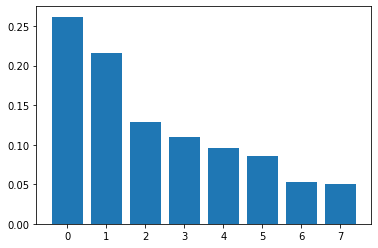

In [5]:
plt.bar(np.arange(8),principle_components.explained_variance_ratio_)

In [6]:
pca = PCA(.95)
principle_components = pca.fit(x)
principle_components.explained_variance_ratio_ 

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

In [7]:
pca = PCA(7)
principle_components = pca.fit(x)
principle_components.explained_variance_ratio_ 

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702])

If we keep 7dimensions,we have 94.76% explained_var_ratio, so we need to keep 8dimensions.

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score. Is that a good clustering?

In [77]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2).fit(x)
kmeans_model.cluster_centers_

array([[ 0.94344046,  0.4069538 ,  0.40491023, -0.21241448, -0.1091328 ,
         0.08843722, -0.01294592,  1.05447672],
       [-0.52032171, -0.22444118, -0.22331413,  0.1171498 ,  0.06018839,
        -0.04877447,  0.00713987, -0.58155989]])

In [78]:
y_pred = kmeans_model.predict(x)

In [79]:
from sklearn.metrics import homogeneity_score,completeness_score
homogeneity_score(labels_true=y,labels_pred = y_pred)

0.06142730271547042

In [80]:
completeness_score(labels_true=y,labels_pred = y_pred)

0.06105284728745029

### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 2019)

In [82]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

In [83]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print(logistic_model.score(x_train,y_train))
print(logistic_model.score(x_test,y_test))

0.7579143389199255
0.7965367965367965


In [89]:
#### test data
from sklearn import metrics
pred = logistic_model.predict(x_test)
per = metrics.precision_score(y_test,pred)
rec = metrics.recall_score(y_test,pred)
acc = metrics.accuracy_score(y_test,pred)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.7288135593220338
0.581081081081081
0.7965367965367965
0.6466165413533834


In [90]:
#### training data
pred = logistic_model.predict(x_train)
per = metrics.precision_score(y_train,pred)
rec = metrics.recall_score(y_train,pred)
acc = metrics.accuracy_score(y_train,pred)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.7051282051282052
0.5670103092783505
0.7579143389199255
0.6285714285714287


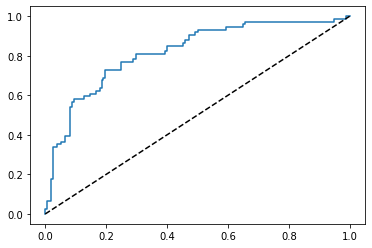

In [91]:
###ROC curve
prob_test = logistic_model.predict_proba(x_test) #### the probability you get 0 and 1
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_test[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

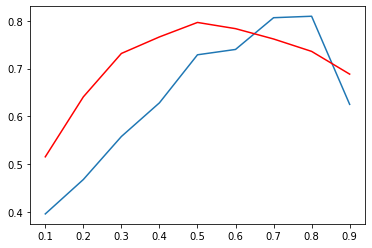

In [92]:
thresholds = np.arange(0.1,1,0.1)
percision_list = []
accuracy_list = []
for threshold in thresholds:
    pred = prob_test[:,1]>threshold
    percision_list.append(metrics.precision_score(y_test,pred))
    accuracy_list.append(metrics.accuracy_score(y_test,pred))
    
plt.plot(thresholds,percision_list)
plt.plot(thresholds,accuracy_list,c = 'r')

## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

In [120]:
import keras
from keras import layers

model = keras.Sequential()
model.add(keras.layers.Dense(10,input_dim = 8,activation = "relu")) 
model.add(keras.layers.Dense(8,activation = "relu"))
model.add(keras.layers.Dense(6,activation = "relu"))
model.add(keras.layers.Dense(5,activation = "relu"))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 150, batch_size = 10,validation_data=(x_test, y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 2s 4ms/step - loss: 0.6897 - acc: 0.5214 - val_loss: 0.6705 - val_acc: 0.6797
Epoch 2/150
537/537 [==============================] - 0s 389us/step - loss: 0.6681 - acc: 0.6387 - val_loss: 0.6519 - val_acc: 0.6797
Epoch 3/150
537/537 [==============================] - 0s 412us/step - loss: 0.6540 - acc: 0.6387 - val_loss: 0.6374 - val_acc: 0.6797
Epoch 4/150
537/537 [==============================] - 0s 404us/step - loss: 0.6374 - acc: 0.6425 - val_loss: 0.6183 - val_acc: 0.6797
Epoch 5/150
537/537 [==============================] - 0s 440us/step - loss: 0.6116 - acc: 0.6536 - val_loss: 0.5946 - val_acc: 0.7056
Epoch 6/150
537/537 [==============================] - 0s 400us/step - loss: 0.5747 - acc: 0.7244 - val_loss: 0.5543 - val_acc: 0.7359
Epoch 7/150
537/537 [==============================] - 0s 399us/step - loss: 0.5296 - acc: 0.7561 - val_loss: 0.5236 - val_acc: 0.7662
Epoch 8/150

In [121]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

537/537 [==============================] - 0s 38us/step
[0.2747054108361292, 0.8826815650227794]
231/231 [==============================] - 0s 51us/step
[0.5892356361919667, 0.7619047619047619]


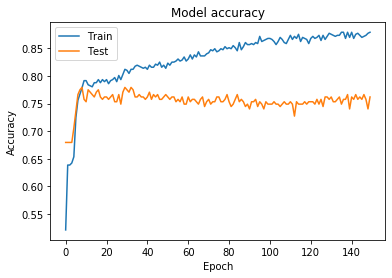

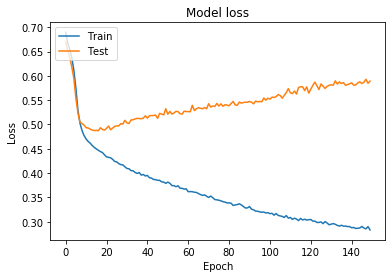

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

Since the model is overfitting, so I am gonna do the regulization.

In [137]:
from keras import regularizers
model = keras.Sequential()
model.add(keras.layers.Dense(10,input_dim = 8,activation = "relu")) 
model.add(keras.layers.Dense(8,activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(6,activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(5,activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(1,activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 150, batch_size = 10,validation_data=(x_test, y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 3s 5ms/step - loss: 0.8592 - acc: 0.6499 - val_loss: 0.8085 - val_acc: 0.7316
Epoch 2/150
537/537 [==============================] - 0s 422us/step - loss: 0.8021 - acc: 0.6667 - val_loss: 0.7520 - val_acc: 0.7273
Epoch 3/150
537/537 [==============================] - 0s 407us/step - loss: 0.7529 - acc: 0.6629 - val_loss: 0.7001 - val_acc: 0.7359
Epoch 4/150
537/537 [==============================] - 0s 406us/step - loss: 0.7053 - acc: 0.6965 - val_loss: 0.6572 - val_acc: 0.7403
Epoch 5/150
537/537 [==============================] - 0s 399us/step - loss: 0.6647 - acc: 0.7132 - val_loss: 0.6181 - val_acc: 0.7532
Epoch 6/150
537/537 [==============================] - 0s 405us/step - loss: 0.6299 - acc: 0.7337 - val_loss: 0.5828 - val_acc: 0.7706
Epoch 7/150
537/537 [==============================] - 0s 414us/step - loss: 0.5976 - acc: 0.7505 - val_loss: 0.5594 - val_acc: 0.7749
Epoch 8/150

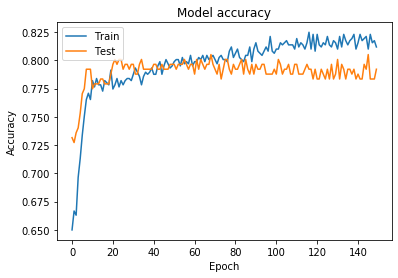

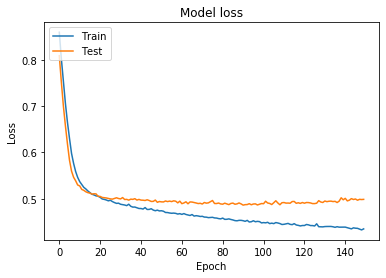

In [138]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

Now the overfitting is solved

In [139]:
pred = model.predict_classes(x_test)
per = metrics.precision_score(y_test,pred)
rec = metrics.recall_score(y_test,pred)
acc = metrics.accuracy_score(y_test,pred)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.6511627906976745
0.7567567567567568
0.7922077922077922
0.7000000000000001


In [140]:
pred = model.predict_classes(x_train)
per = metrics.precision_score(y_train,pred)
rec = metrics.recall_score(y_train,pred)
acc = metrics.accuracy_score(y_train,pred)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.7671957671957672
0.7474226804123711
0.8268156424581006
0.7571801566579635


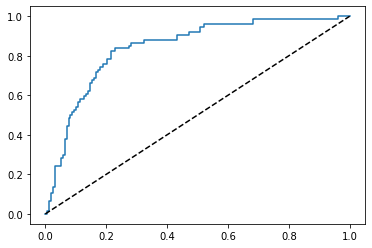

In [141]:
prob_test = model.predict(x_test) 
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_test[:,0])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

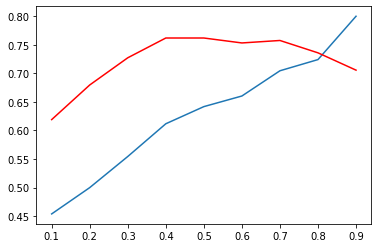

In [128]:
thresholds = np.arange(0.1,1,0.1)
precision_list = []
accuracy_list = []
for threshold in thresholds:
    pred = prob_test[:,0]>threshold
    precision_list.append(metrics.precision_score(y_test,pred))
    accuracy_list.append(metrics.accuracy_score(y_test,pred))
    
plt.plot(thresholds,precision_list)
plt.plot(thresholds,accuracy_list,c = 'r')

## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
rfc_pred_test = rfc.predict(x_test)
# rfc.score(x_test,y_test)
per = metrics.precision_score(y_test,rfc_pred_test)
rec = metrics.recall_score(y_test,rfc_pred_test)
acc = metrics.accuracy_score(y_test,rfc_pred_test)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.6521739130434783
0.6081081081081081
0.7705627705627706
0.6293706293706294


In [101]:
rfc_pred_train = rfc.predict(x_train)
per = metrics.precision_score(y_train,rfc_pred_train)
rec = metrics.recall_score(y_train,rfc_pred_train)
acc = metrics.accuracy_score(y_train,rfc_pred_train)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

1.0
1.0
1.0
1.0


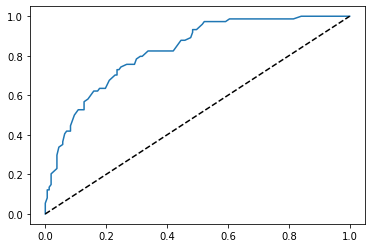

In [102]:
prob_test = rfc.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_test[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

In [105]:
rfc = RandomForestClassifier(n_estimators=1000,max_depth = 8)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
### test dataset
rfc_pred_test = rfc.predict(x_test)
# rfc.score(x_test,y_test)
per = metrics.precision_score(y_test,rfc_pred_test)
rec = metrics.recall_score(y_test,rfc_pred_test)
acc = metrics.accuracy_score(y_test,rfc_pred_test)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.647887323943662
0.6216216216216216
0.7705627705627706
0.6344827586206897


In [107]:
#### training dataset
rfc_pred_train = rfc.predict(x_train)
per = metrics.precision_score(y_train,rfc_pred_train)
rec = metrics.recall_score(y_train,rfc_pred_train)
acc = metrics.accuracy_score(y_train,rfc_pred_train)
f1 = 2*per*rec/(per+rec)
print(per)
print(rec)
print(acc)
print(f1)

0.9946236559139785
0.9536082474226805
0.9813780260707635
0.9736842105263157


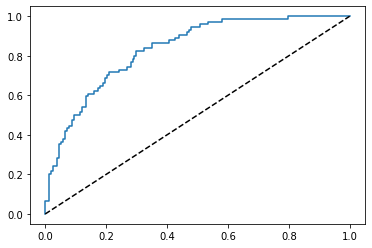

In [110]:
prob_test = rfc.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_test[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [111]:
###yes the overfitting is better

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


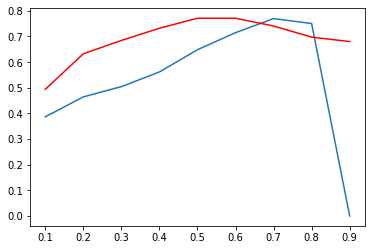

In [112]:
prob_test = rfc.predict_proba(x_test)
thresholds = np.arange(0.1,1,0.1)
precision_list = []
accuracy_list = []
for threshold in thresholds:
    pred = prob_test[:,1]>threshold
    precision_list.append(metrics.precision_score(y_test,pred))
    accuracy_list.append(metrics.accuracy_score(y_test,pred))
    
plt.plot(thresholds,precision_list)
plt.plot(thresholds,accuracy_list,c = 'r')

# Finally: 
- Write a few lines about each of the three models and if there is one superior model and why do you think so?

logistic regression: LR is easy to control, we can use it to do regression and classification as a baseline model.
DNN: it's good to solve the nonlinear classification and complicated linear problems, but it's hard to control the layers and nerons,
we need to try more, and it is time consuming.
Random forest: it;s very good to do the regression and classification problems, we also need to find the best parameters.
I don't think there is a superior model,for every dataset we need to try different models, different parameters in each model, then find the
best model for that dataset.

- **Also thanks for a great quarter :) .. I will miss you and wish you all the best**

- **Do not forget to submit the survey about the class. Be specific about your problems. Class settings, instructor, material, .. etc. Your voice makes a difference**

![](machine_learning.png)